# Time Series Prediction using Dynamic Mode Decomposition

In this tutorial, we will demonstrate the use of the class ``kontrol.dmd.DMD`` for time series prediction using dynamic mode decomposition.
For simplicity, we will model a double decaying oscillation.

$y(t) = \mathfrak{Re}\left(a_1e^{(\sigma_1+i\omega_1) t} + a_2e^{\sigma_2 t + i(\omega_2 t+\phi)}\right)\,,$

where $a_1=1$, $\sigma_1=-0.2$, $\omega_1=3$, $a_2=4$, $\sigma_2=-0.5$, $\omega_2=6$, and $\phi=7$.

We will generate a time series of 10 seconds.
We use the first 1/2 of the time series to predict the remaining 1/2 of the time series.

Text(0.5, 0, 'Time (s)')

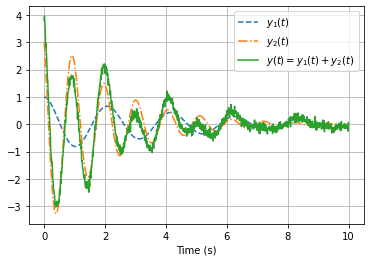

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kontrol


t = np.linspace(0, 10, 1024)
a1 = 1
sigma_1 = -0.2
omega_1 = 3
a2 = 4
sigma_2 = -0.5
omega_2 = 6
phi = 7
y1 = np.real(a1*np.exp((sigma_1+1j*omega_1)*t))
y2 = np.real(a2*np.exp(sigma_2*t+1j*(omega_2*t+phi)))
y = y1 + y2

# add noise
n = np.random.normal(loc=0, scale=0.1, size=len(y))
y = y+n

plt.plot(t, y1, "--", label="$y_1(t)$")
plt.plot(t, y2, "-.", label="$y_2(t)$")
plt.plot(t, y, label="$y(t) = y_1(t)+y_2(t)$")
plt.legend(loc=0)
plt.grid(which="both")
plt.xlabel("Time (s)")

In [2]:
# Use first half of the data for training.
y_data = y[:512]
y_mean = np.mean(y_data)

# Create a hankel matrix with 128 rows.
snapshot_1 = kontrol.dmd.hankel(y_data, 128)

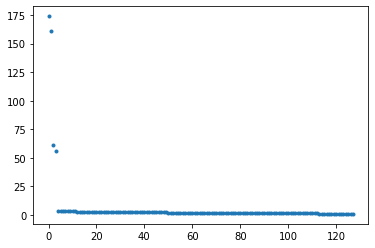

In [3]:
# Create the DMD instance and use the DMD algorithm to obtain a model.
dmd = kontrol.dmd.DMD(snapshot_1=snapshot_1)

# Several steps but can be simplified later.
# Calculate the SVD of the data matrix
u, sigma, vh = dmd.svd()
# This gives the singular values which could aid the selection of truncation value.

# Plot the singular values
plt.plot(dmd.sigma, ".")

From the plot, we see that the dynamics of the time series can be represented by four modes.
Therefore, we can set the truncation value to 4.

In [4]:
dmd.truncation_value = 4
dmd.dt = t[1]-t[0]

ut, sigma_t, vht = dmd.low_rank_approximation()
A_reduced = dmd.compute_reduced_model()
w_reduced, v_reduced = dmd.eig_reduced_model()
dmd_modes = dmd.compute_dmd_modes()
omegas = dmd.compute_complex_frequencies()

# or simply set the truncation value and dt and then run
# dmd.run()

In [5]:
t_predict = t[512:]
y_predict = np.real(dmd.predict(t_predict)[0])

Text(0.5, 0, 'Time (s)')

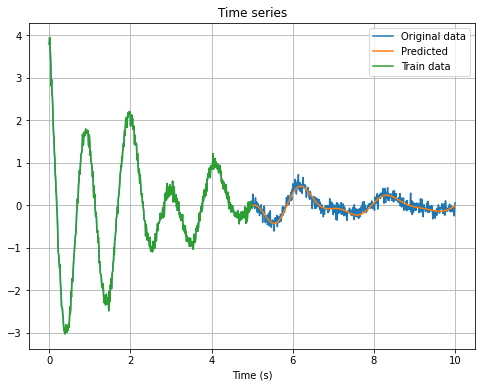

In [6]:
plt.figure(figsize=(8, 6))
plt.title("Time series")
plt.plot(t, y, label="Original data")
plt.plot(t_predict, y_predict, label="Predicted")
plt.plot(t[:512], y_data, label="Train data")
plt.legend(loc=0)
plt.grid(which="both")
plt.xlabel("Time (s)")